In [ ]:
!wget https://raw.githubusercontent.com/newtonis/tps_imagenes/master/tp2/fourier_transform/images/pens.jpg

--2020-08-28 22:51:48--  https://raw.githubusercontent.com/newtonis/tps_imagenes/master/tp2/fourier_transform/images/pens.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38560 (38K) [image/jpeg]
Saving to: ‘pens.jpg.1’

pens.jpg.1          100%[===================>]  37.66K  --.-KB/s    in 0.02s   

2020-08-28 22:51:50 (2.40 MB/s) - ‘pens.jpg.1’ saved [38560/38560]



In [ ]:
!wget https://raw.githubusercontent.com/newtonis/tps_imagenes/master/tp2/fourier_transform/images/barbara.jpg

--2020-08-28 22:56:32--  https://raw.githubusercontent.com/newtonis/tps_imagenes/master/tp2/fourier_transform/images/barbara.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121838 (119K) [image/jpeg]
Saving to: ‘barbara.jpg’

barbara.jpg         100%[===================>] 118.98K  --.-KB/s    in 0.04s   

2020-08-28 22:56:33 (2.92 MB/s) - ‘barbara.jpg’ saved [121838/121838]



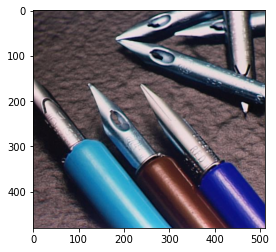

In [ ]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('pens.jpg') 
plt.imshow(img)

In [ ]:
!wget https://raw.githubusercontent.com/asharma327/Read_Gif_OpenCV_Python/master/gif_to_pic.py

--2020-08-28 22:51:52--  https://raw.githubusercontent.com/asharma327/Read_Gif_OpenCV_Python/master/gif_to_pic.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1606 (1.6K) [text/plain]
Saving to: ‘gif_to_pic.py.1’

gif_to_pic.py.1     100%[===================>]   1.57K  --.-KB/s    in 0s      

2020-08-28 22:51:52 (29.5 MB/s) - ‘gif_to_pic.py.1’ saved [1606/1606]



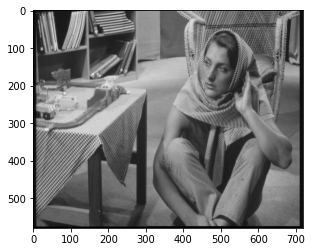

In [ ]:
img = cv2.imread('barbara.jpg') 

plt.imshow(img)

# Example 1

Creamos una impulso unitario y lo graficamos

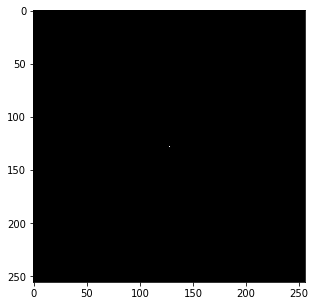

In [ ]:
import numpy as np
N = 256
plt.figure(figsize =(5, 5)) 
img_ = np.zeros((N,N)) # imagen de 256x256
img_[N//2,N//2] = 1 # impulso
plt.imshow(img_,cmap='gray', vmin=0, vmax=1) # graficamos impulso

Hacemos zoom para ver la convolucion del filtro con la delta. Si lo vemos desde lejos no podemos apreciar nada (lo vemos como un punto aproximadamente).
La convolucion debe darnos el filtro.

Los valores en el zoom son:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.16666667 0.         0.        ]
 [0.         0.16666667 0.33333333 0.16666667 0.        ]
 [0.         0.         0.16666667 0.         0.        ]
 [0.         0.         0.         0.         0.        ]]


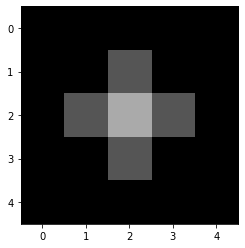

In [ ]:
from scipy import signal
h = np.array([ [0,1/6, 0], [1/6, 1/3, 1/6], [0, 1/6 , 0] ])

conv_image = signal.convolve2d(img_, h, boundary='symm', mode='same')
low = N//2 - 2
high = N//2 + 2+1

zoom = conv_image[low:high,low:high]
print("Los valores en el zoom son:")
print(zoom)
plt.imshow(zoom,cmap='gray', vmin=0, vmax=0.5) 

Realizamos un plot del modulo del espectro

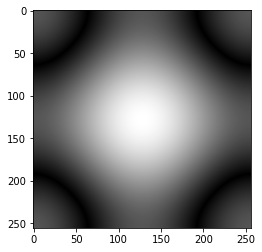

In [ ]:
spectrum = np.fft.fft2(conv_image)
module = np.abs(np.fft.fftshift(spectrum))
max_val = np.max(module)
plt.imshow(module,cmap='gray', vmin=0, vmax=max_val) 

Realizamos un plot 3D del modulo del espectro

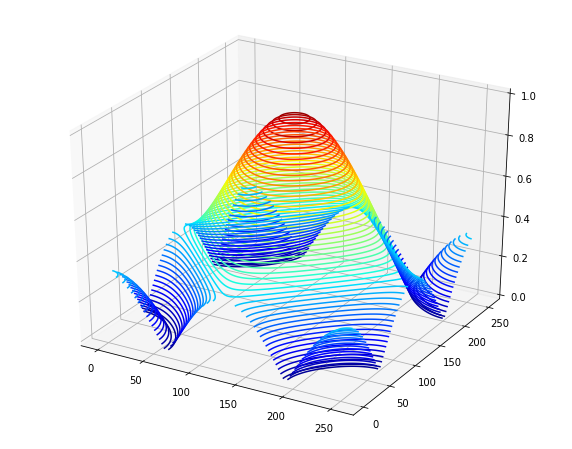

In [ ]:
plt.figure(figsize =(10, 8)) 
ax = plt.axes(projection='3d')
m,n = module.shape
X = np.array(range(m))
Y = np.array(range(n))
Z = module
ax.contour3D(X, Y, module, 50, cmap='jet')

Aplicamos logaritmo porque la respuesta perceptual de la vision es de caracteristica logaritmica

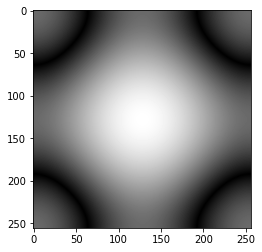

In [ ]:
spectrum = np.fft.fft2(conv_image)
module = np.log10(1+np.abs(np.fft.fftshift(spectrum))) # 1+ para que no haga np.log(0)
max_val = np.max(module)
plt.imshow(module,cmap='gray', vmin=0, vmax=max_val) 